<a href="https://colab.research.google.com/github/NusRAT-LiA/Educational-Resource-Allocation-for-Bangladesh/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('education_data.csv')


In [ ]:
features = [
    'TSR',  # Teacher-Student Ratio
    'Total_Students',
    'Female_Students',
    'Disabled_Students',
    'Pass_Rate',
    'Dropout_Rate',
    'Internet_Access',
    'Electricity_Access',
    'Budget',
    'Community_Contribution',
    'Girls_Toilet',
    'Solar_System'
]

In [ ]:
X = df[features]
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables into binary

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering using KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

<ipython-input-11-2dd72c1180be>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 0], x='Cluster', y='Pass_Rate', data=df, palette='muted')


Text(0.5, 1.0, 'Average Internet Access by Cluster')

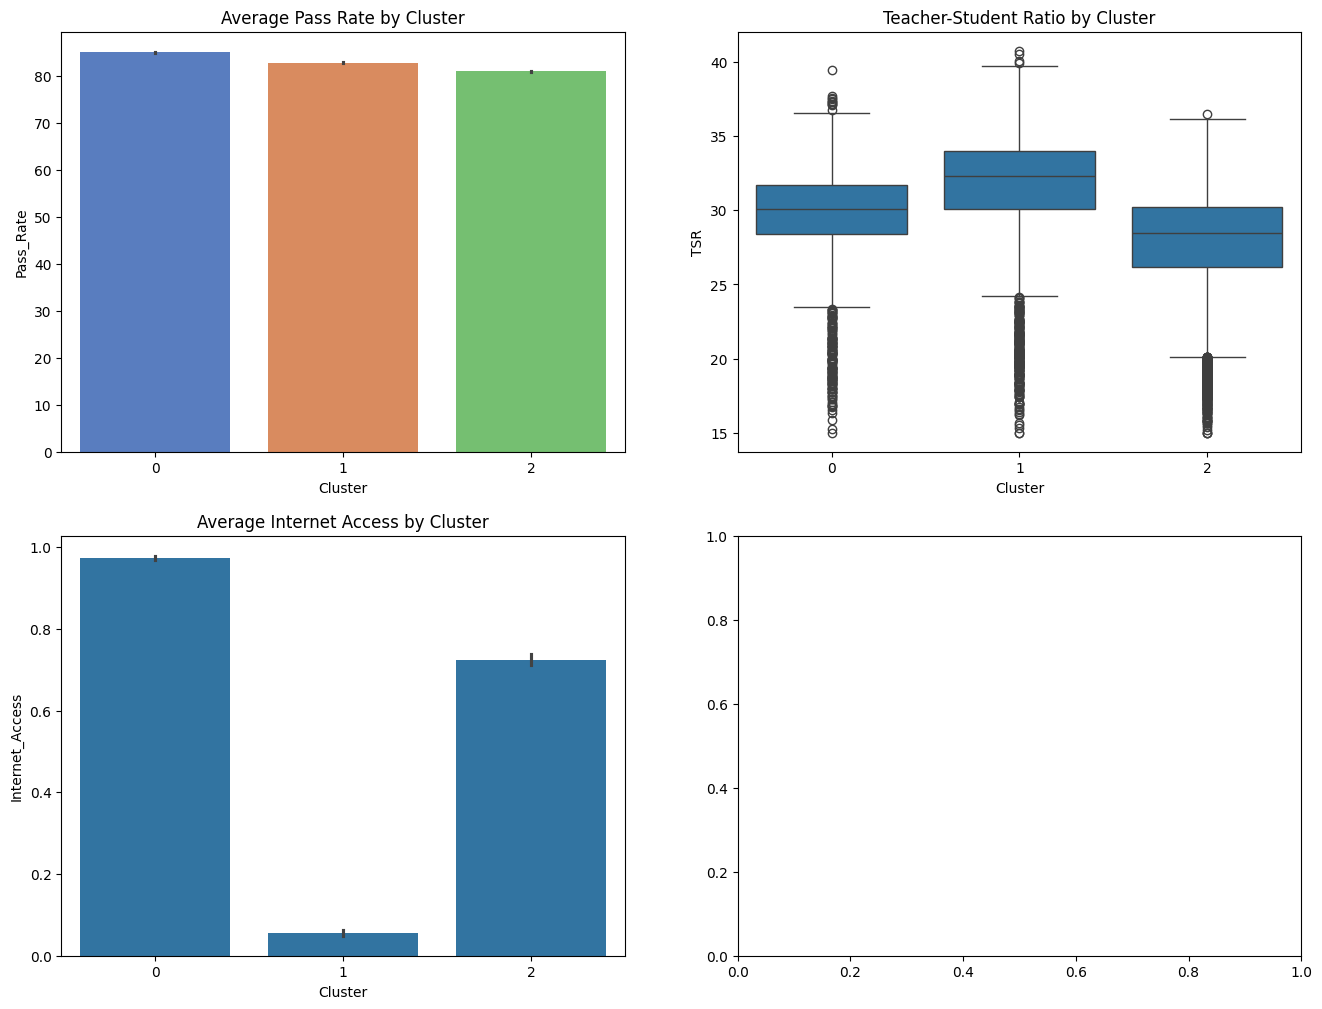

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.barplot(ax=axes[0, 0], x='Cluster', y='Pass_Rate', data=df, palette='muted')
axes[0, 0].set_title('Average Pass Rate by Cluster')

sns.boxplot(ax=axes[0, 1], x='Cluster', y='TSR', data=df)
axes[0, 1].set_title('Teacher-Student Ratio by Cluster')

sns.barplot(ax=axes[1, 0], x='Cluster', y='Internet_Access', data=df)
axes[1, 0].set_title('Average Internet Access by Cluster')

In [ ]:
plt.tight_layout()
plt.show()

# Cluster Statistics
cluster_stats = df.groupby('Cluster')[features].mean()
print("\nCluster Statistics:")
print(cluster_stats)


<Figure size 640x480 with 0 Axes>


Cluster Statistics:
               TSR  Total_Students  Female_Students  Disabled_Students  \
Cluster                                                                  
0        29.875608      568.339934       298.406412          27.074965   
1        31.416883      551.316299       286.152501          26.807154   
2        27.673047     1030.214604       505.822772          51.971782   

         Pass_Rate  Dropout_Rate  Internet_Access  Electricity_Access  \
Cluster                                                                 
0        85.096992     29.079765         0.974776            0.910207   
1        82.819577     32.912557         0.054599            0.750870   
2        80.985960     22.197732         0.723762            0.882938   

               Budget  Community_Contribution  Girls_Toilet  Solar_System  
Cluster                                                                    
0        2.514036e+07            1.393395e+06      0.990570      0.296322  
1        2.543

In [ ]:
# Generate recommendations based on extended features
def generate_recommendations(cluster_stats):
    recommendations = []
    for cluster in cluster_stats.index:
        stats = cluster_stats.loc[cluster]
        rec = f"Cluster {cluster} Recommendations:\n"

        if stats['Internet_Access'] < 0.4:
            rec += "- Expand internet and digital learning infrastructure\n"
        if stats['TSR'] > 40:
            rec += "- Hire and train more teachers\n"
        if stats['Girls_Toilet'] < 0.5:
            rec += "- Improve gender-specific sanitation facilities\n"

        if stats['Community_Contribution'] < 0.2:
            rec += "- Foster community participation in school programs\n"

        recommendations.append(rec)
    return recommendations

# Print recommendations
print("\nActionable Recommendations:")
for rec in generate_recommendations(cluster_stats):
    print(rec)



Actionable Recommendations:
Cluster 0 Recommendations:

Cluster 1 Recommendations:
- Expand internet and digital learning infrastructure

Cluster 2 Recommendations:



<ipython-input-16-725f438d48ef>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 0], x='Cluster', y='Pass_Rate', data=df, palette='pastel')


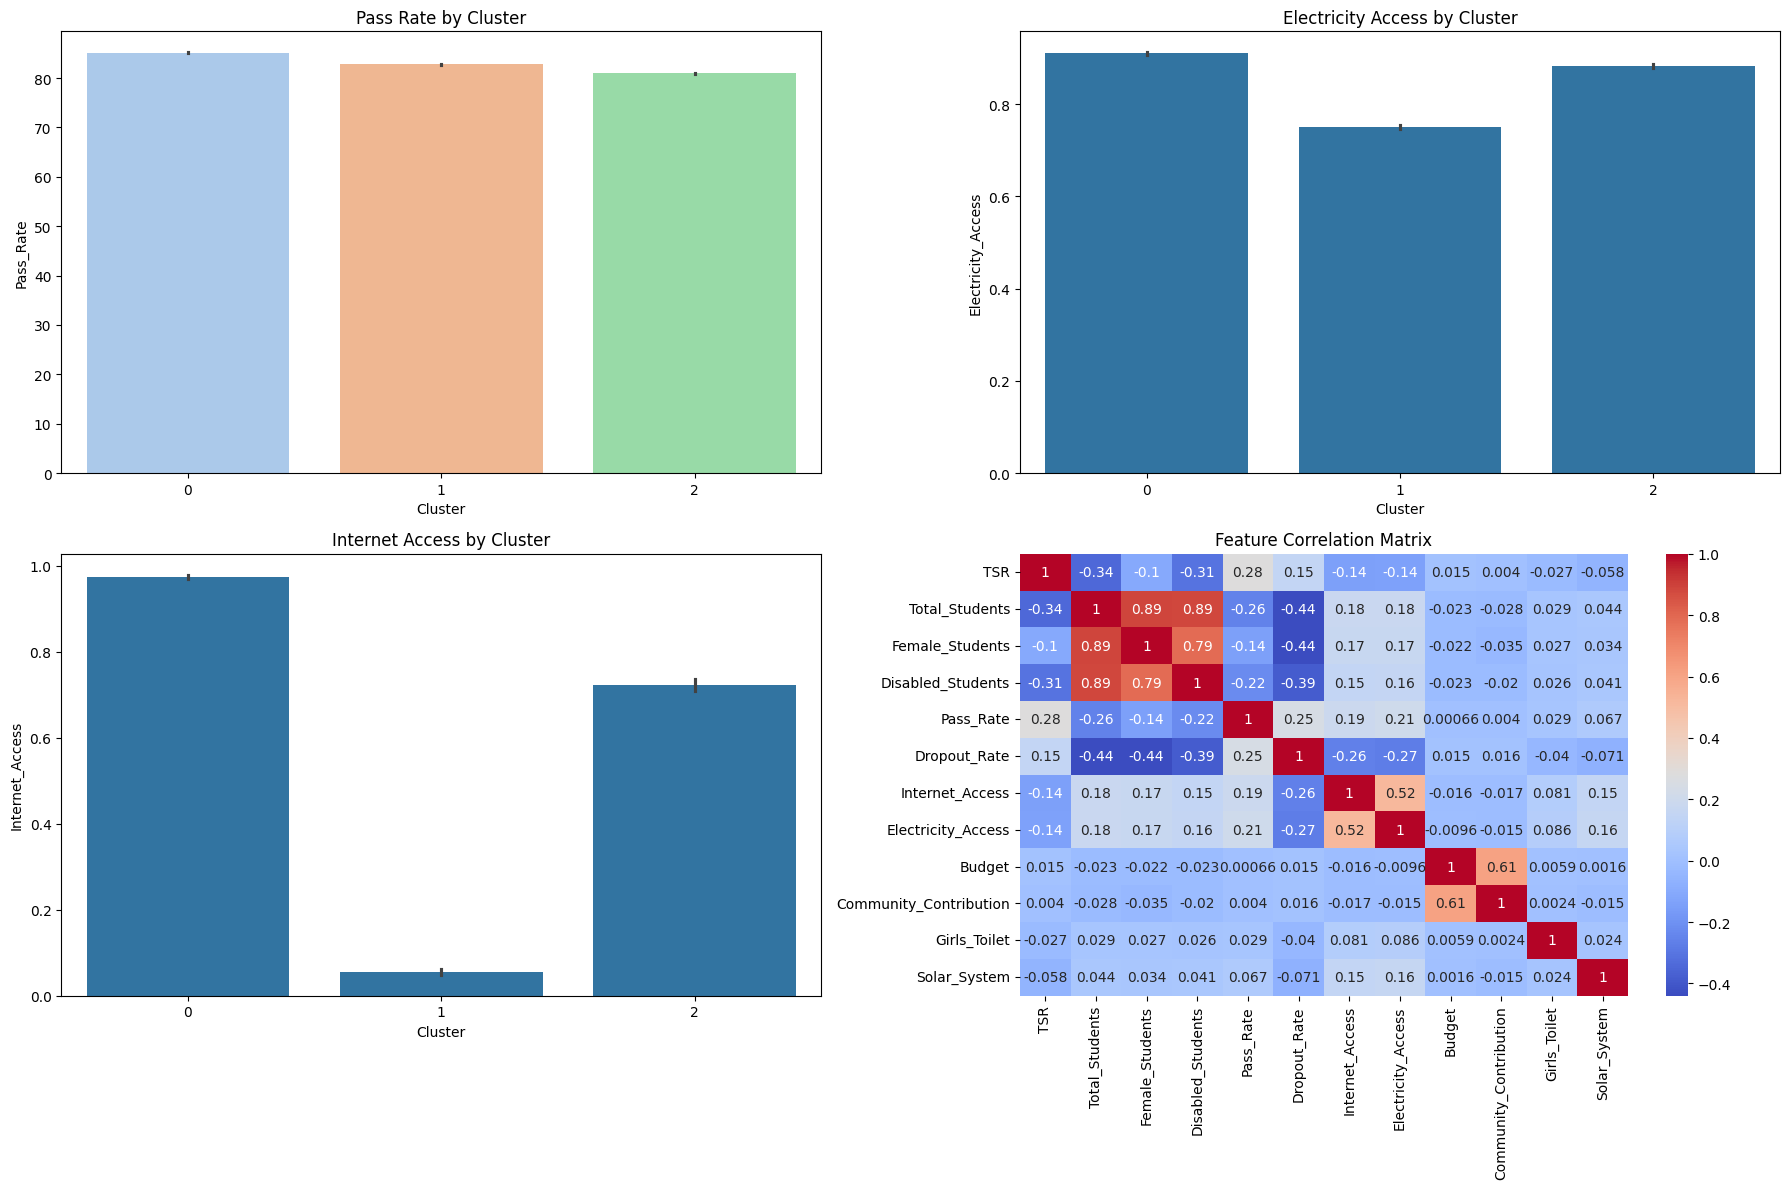

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Pass Rate by Cluster
sns.barplot(ax=axes[0, 0], x='Cluster', y='Pass_Rate', data=df, palette='pastel')
axes[0, 0].set_title('Pass Rate by Cluster')

# Electricity and Internet Access
sns.barplot(ax=axes[0, 1], x='Cluster', y='Electricity_Access', data=df)
axes[0, 1].set_title('Electricity Access by Cluster')

sns.barplot(ax=axes[1, 0], x='Cluster', y='Internet_Access', data=df)
axes[1, 0].set_title('Internet Access by Cluster')

# Correlation Matrix
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Feature Correlation Matrix')

plt.tight_layout()
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       840
           1       0.95      0.96      0.96       738
           2       0.96      0.95      0.96       822

    accuracy                           0.96      2400
   macro avg       0.96      0.96      0.96      2400
weighted avg       0.96      0.96      0.96      2400



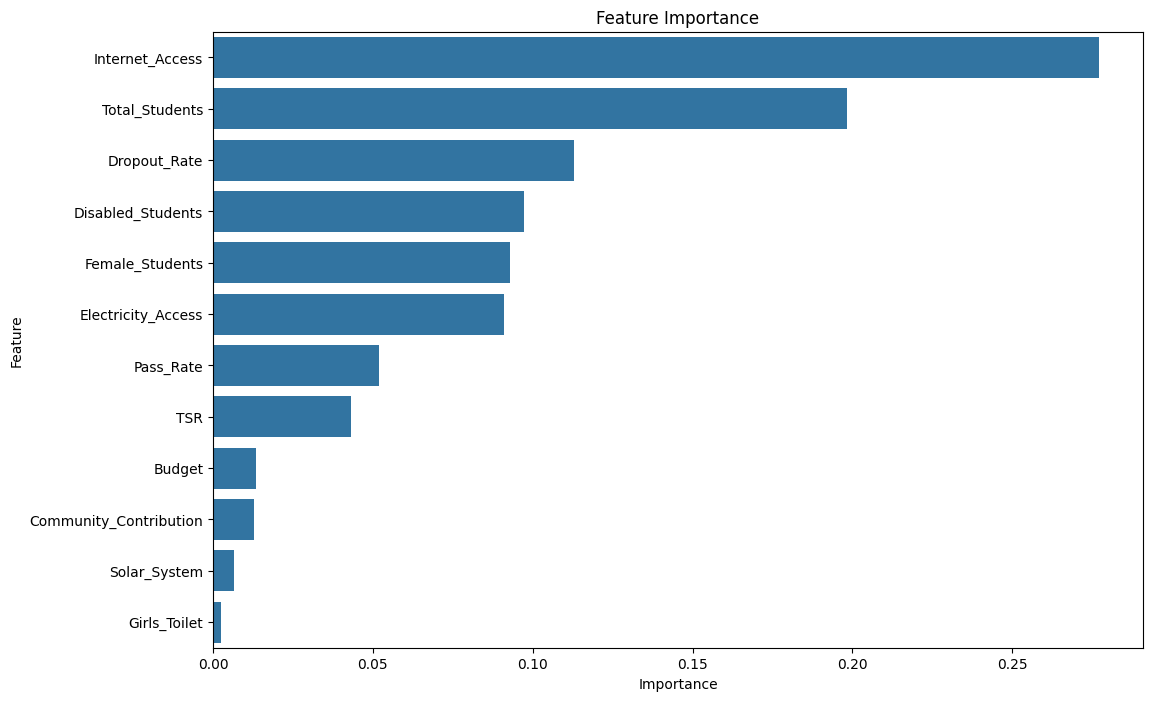

In [ ]:
y = df['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Model evaluation
predictions = rf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# Feature Importance
importance = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()